In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
%pylab inline
import warnings
warnings.filterwarnings('ignore')


Populating the interactive namespace from numpy and matplotlib


In [2]:
hw_abt_2_bybucket=pd.read_csv('D:/Techno/task7/hw_abt_2_bybucket.csv', header=0, delimiter='\t')

In [3]:
hw_abt_2_byuser=pd.read_csv('D:/Techno/task7/hw_abt_2_byuser.csv', header=0, delimiter='\t')

In [4]:
hw_abt_2_byuser

,Unnamed: 0,group_id,metric_value,users,visits,churn_users,churn_visits,group
0,0,8,6630.000,0,0,0,8,A
1,1,13,6933.976,0,0,1,6,B
2,2,10,8261.976,1,10,1,8,B
3,3,4,5522.000,1,9,1,7,A
4,4,16,5075.976,1,6,0,8,B
...,...,...,...,...,...,...,...,...
4995,4995,6,3666.000,1,4,1,5,A
4996,4996,12,6464.976,0,0,1,8,B
4997,4997,1,4335.000,0,0,0,8,A
4998,4998,13,6307.976,0,0,1,8,B


In [5]:
test=(hw_abt_2_byuser['visits'] == 0) & (hw_abt_2_byuser['users'] != 0)

In [6]:
test.describe()

count      5000
unique        2
top       False
freq       4783
dtype: object

Проведя проверку данных мы видим, что в результате ошибки логирования часть данных имеют неоднозначность: количество пользователей ненулевое, при нулевом числе посещений. Значению числа посещений в данном случае верить нельзя. Заменим их на средние.

In [7]:
hw_abt_2_byuser.loc[(hw_abt_2_byuser['visits'] == 0) & (hw_abt_2_byuser['users'] != 0), 'visits'] = hw_abt_2_byuser['visits'].mean()

Отсортируем значения по группам для разделения на контрольную и экспериментальную.

In [8]:
hw_abt_2_byuser=hw_abt_2_byuser.sort_values(by='group')
hw_abt_2_byuser=hw_abt_2_byuser.reset_index(drop=True)
hw_abt_2_byuser['group'].describe()

count     5000
unique       2
top          B
freq      2549
Name: group, dtype: object

In [9]:
hw_abt_2_byuser_A=hw_abt_2_byuser[0:2451]

In [10]:
hw_abt_2_byuser_B=hw_abt_2_byuser[2451:]

In [11]:
hw_abt_2_byuser_A

,Unnamed: 0,group_id,metric_value,users,visits,churn_users,churn_visits,group
0,0,8,6630.0,0,0.0,0,8,A
1,2760,8,7490.0,0,0.0,0,8,A
2,2765,4,4838.0,1,28.0,1,7,A
3,2766,5,5936.0,0,0.0,1,6,A
4,2768,8,3158.0,1,5.0,0,8,A
...,...,...,...,...,...,...,...,...
2446,1389,3,8008.0,1,3.0,1,3,A
2447,1635,5,4063.0,1,9.0,1,7,A
2448,196,8,7552.0,0,0.0,0,7,A
2449,1550,1,7239.0,1,11.0,0,8,A


# Оценка равенства дисперсий исследуемых метрик в группах и проверка нормальности распределений

Проведем проверку метрики metric_value на нормальность двумя способами: тест Колмогорова-Смирнова и тест Шапиро-Уилка для двух групп.

Группа А:

In [82]:
from scipy.stats import kstest
alpha = 0.05
st = kstest(hw_abt_2_byuser_A['metric_value'], 'norm')
print('Distributions is {}normal\n'.format( {True:'not ',
False:''}[st[1] < alpha]))

Distributions is not normal



In [13]:
from scipy.stats import shapiro
alpha = 0.05
st = shapiro(hw_abt_2_byuser_A['metric_value'])
print('Distributions is {}normal\n'.format( {True:'not ',
False:''}[st[1] < alpha]))

Distributions is not normal



Оба теста говорят, что распределение не является нормальным на уровне значимости 5%. Построим Q-Q plot

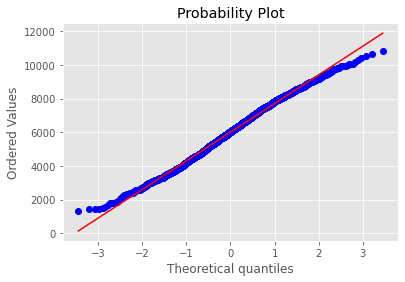

In [14]:
import numpy as np 
import pylab 
import scipy.stats as stats

   
stats.probplot(hw_abt_2_byuser_A['metric_value'], dist="norm", plot=pylab)
pylab.show()

По  Q-Q plot складывается ощущение, что распределения очень близки к нормальному. Однако, мы не будем рисковать и в дальнейшем для проверки равенства дисперсий будем использовать тест Левена, который менее чувствителен к отклонению распределения от нормального.

Группа В:

In [15]:
from scipy.stats import kstest
alpha = 0.05
st = kstest(hw_abt_2_byuser_B['metric_value'], 'norm')
print('Distributions is {}normal\n'.format( {True:'not ',
False:''}[st[1] < alpha]))

Distributions is not normal



In [16]:
from scipy.stats import shapiro
alpha = 0.05
st = shapiro(hw_abt_2_byuser_B['metric_value'])
print('Distributions is {}normal\n'.format( {True:'not ',
False:''}[st[1] < alpha]))

Distributions is not normal



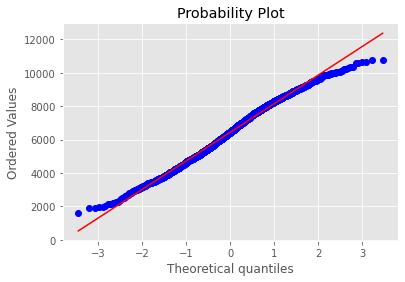

In [17]:
import numpy as np 
import pylab 
import scipy.stats as stats

   
stats.probplot(hw_abt_2_byuser_B['metric_value'], dist="norm", plot=pylab)
pylab.show()

Для группы B результат аналогичный, причем отклонения от нормального даже выше.

In [18]:
import numpy as np
from scipy.stats import levene
alpha = 0.05

def levene_test(df1, df2, p_value = alpha):
    st = levene(df1, df2)
    print('Variances of distributions is {}equal\n'.format( {True:'not ',False:''}[st[1] < p_value]))
    
levene_test(hw_abt_2_byuser_A['metric_value'], hw_abt_2_byuser_B['metric_value'])

Variances of distributions is equal



По критерию Левена на 5% уровне значимости дисперсии двух выборок можно признать равными

Создадим собственные метрики. Например, будем считать долю успешных посещений сайта. Под успешными, будем понимать посещения, которые привели к целевому действию. Уберем все записи, где не было ниодного визита.

In [19]:
share_visits_A=hw_abt_2_byuser_A['visits']/(hw_abt_2_byuser_A['churn_visits']+hw_abt_2_byuser_A['visits'])

In [20]:
share_visits_A=share_visits_A.dropna()

In [21]:
share_visits_B=hw_abt_2_byuser_B['visits']/(hw_abt_2_byuser_B['churn_visits']+hw_abt_2_byuser_B['visits'])

In [22]:
share_visits_B=share_visits_B.dropna()

Группа А:

In [23]:
from scipy.stats import kstest
alpha = 0.05
st = kstest(share_visits_A, 'norm')
print('Distributions is {}normal\n'.format( {True:'not ',
False:''}[st[1] < alpha]))

Distributions is not normal



In [24]:
from scipy.stats import shapiro
alpha = 0.05
st = shapiro(share_visits_A)
print('Distributions is {}normal\n'.format( {True:'not ',
False:''}[st[1] < alpha]))

Distributions is not normal



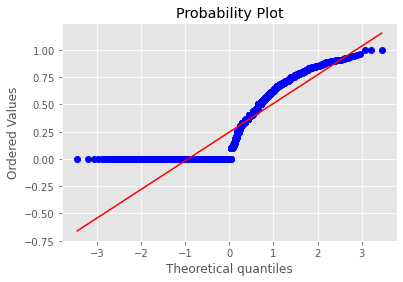

In [25]:
import numpy as np 
import pylab 
import scipy.stats as stats

   
stats.probplot(share_visits_A, dist="norm", plot=pylab)
pylab.show()

Распределение данной метрики не является нормальным, что видно и на тестах и на QQ- plot.

Группа B:

In [26]:
from scipy.stats import kstest
alpha = 0.05
st = kstest(share_visits_B, 'norm')
print('Distributions is {}normal\n'.format( {True:'not ',
False:''}[st[1] < alpha]))

Distributions is not normal



In [27]:
from scipy.stats import shapiro
alpha = 0.05
st = shapiro(share_visits_B)
print('Distributions is {}normal\n'.format( {True:'not ',
False:''}[st[1] < alpha]))

Distributions is not normal



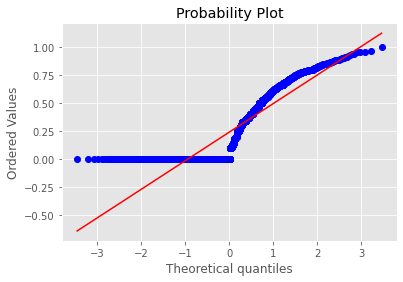

In [28]:
import numpy as np 
import pylab 
import scipy.stats as stats

   
stats.probplot(share_visits_B, dist="norm", plot=pylab)
pylab.show()

Для данной метрики распределение тоже не является нормальным. Просто для интереса попробуем сравнить, что дадут все виды тестов на равенство дисперсий. Доверять будем только тесту Левена.

In [29]:
levene_test(share_visits_A, share_visits_B)

Variances of distributions is equal



In [30]:

from scipy.stats import f_oneway
alpha = 0.05
st = f_oneway(share_visits_A, share_visits_B)
print('{} the H0: Var(X1) == Var(X2)\n'.format(
{True:'Reject', False:'Confirm'}[st[1] > alpha]))

Reject the H0: Var(X1) == Var(X2)



In [31]:
from scipy.stats import bartlett
alpha = 0.05
def bartlett_test(df1, df2, p_value = alpha):
    st = bartlett(df1, df2)
    print('Variances of distributions is {}equal\n'.format( {True:'not ', False:''}[st[1] < p_value]))

bartlett_test(share_visits_A, share_visits_B)

Variances of distributions is equal



Тест Фишера дает результат отличный, от двух других тестов. Можно с натяжкой сказать, что он более чувствителен к нормальности распределения, чем тест Бартлетта.

В качестве метрики также рассмотрим долю ушедших от нас пользователей. Откуда также уберет случаи, когда пользователей не было вообще.

In [32]:
share_churn_users_A=hw_abt_2_byuser_A['users']/(hw_abt_2_byuser_A['churn_users']+hw_abt_2_byuser_A['users'])

In [33]:
share_churn_users_A=share_churn_users_A.dropna()

In [34]:
share_churn_users_B=hw_abt_2_byuser_B['users']/(hw_abt_2_byuser_B['churn_users']+hw_abt_2_byuser_B['users'])

In [35]:
share_churn_users_B=share_churn_users_B.dropna()

Группа А:

In [36]:
from scipy.stats import kstest
alpha = 0.05
st = kstest(share_churn_users_A, 'norm')
print('Distributions is {}normal\n'.format( {True:'not ',False:''}[st[1] < alpha]))

Distributions is not normal



In [37]:
from scipy.stats import shapiro
alpha = 0.05
st = shapiro(share_churn_users_A)
print('Distributions is {}normal\n'.format( {True:'not ',
False:''}[st[1] < alpha]))

Distributions is not normal



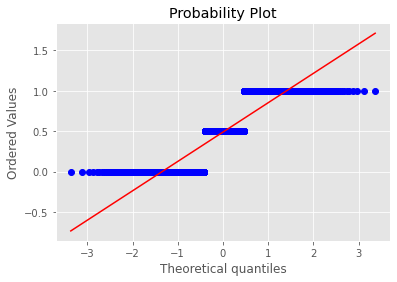

In [38]:
import numpy as np 
import pylab 
import scipy.stats as stats

   
stats.probplot(share_churn_users_A, dist="norm", plot=pylab)
pylab.show()

Распределение не является нормальным по всем показателям для группы А

In [39]:
from scipy.stats import kstest
alpha = 0.05
st = kstest(share_churn_users_B, 'norm')
print('Distributions is {}normal\n'.format( {True:'not ',False:''}[st[1] < alpha]))

Distributions is not normal



In [40]:
from scipy.stats import shapiro
alpha = 0.05
st = shapiro(share_churn_users_B)
print('Distributions is {}normal\n'.format( {True:'not ',
False:''}[st[1] < alpha]))

Distributions is not normal



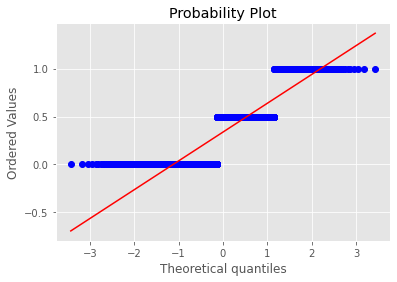

In [41]:
import numpy as np 
import pylab 
import scipy.stats as stats

   
stats.probplot(share_churn_users_B, dist="norm", plot=pylab)
pylab.show()

Распределение не является нормальным по всем показателям для группы В

In [42]:
levene_test(share_churn_users_A, share_churn_users_B)

Variances of distributions is not equal



Тест Левена на 5% уровне значимости дает, что дисперсии двух распределений не равны.

# Проверка статистической значимости различий исследуемых метрик в выборках

Метрика: metric_value

In [43]:
from collections import Counter
counter = Counter(hw_abt_2_byuser_A['metric_value'])
print(counter)

Counter({6451.0: 4, 4592.0: 4, 6630.0: 3, 6018.0: 3, 6813.0: 3, 7898.0: 3, 6154.0: 3, 6273.0: 3, 6208.0: 3, 8208.0: 3, 5684.0: 3, 5451.0: 3, 7558.0: 3, 5238.0: 3, 7455.0: 3, 7479.0: 3, 6779.0: 3, 7938.0: 3, 5107.0: 3, 6334.0: 3, 7018.0: 3, 4724.0: 3, 4523.0: 3, 5634.0: 3, 7592.0: 3, 4872.0: 3, 5162.0: 3, 5625.0: 3, 4991.0: 3, 6553.0: 3, 5499.0: 3, 8195.0: 3, 6923.0: 3, 5704.0: 3, 7166.0: 3, 7096.0: 3, 6996.0: 3, 7146.0: 3, 5896.0: 3, 3544.0: 3, 7821.0: 3, 5656.0: 3, 3101.0: 3, 5863.0: 3, 5490.0: 3, 6447.0: 3, 7245.0: 3, 4838.0: 2, 3158.0: 2, 8015.0: 2, 7650.0: 2, 6049.0: 2, 6641.0: 2, 5165.0: 2, 5293.0: 2, 7098.0: 2, 7761.0: 2, 4683.0: 2, 6988.0: 2, 5811.0: 2, 7328.0: 2, 7194.0: 2, 6560.0: 2, 8765.0: 2, 6880.0: 2, 6368.0: 2, 4539.0: 2, 6683.0: 2, 8397.0: 2, 5582.0: 2, 6418.0: 2, 6247.0: 2, 8877.0: 2, 7430.0: 2, 6845.0: 2, 6949.0: 2, 4190.0: 2, 2433.0: 2, 3075.0: 2, 3852.0: 2, 6199.0: 2, 4712.0: 2, 6332.0: 2, 4870.0: 2, 6943.0: 2, 5977.0: 2, 7406.0: 2, 5983.0: 2, 8665.0: 2, 5214.0: 2, 3

In [44]:
from collections import Counter
counter = Counter(hw_abt_2_byuser_B['metric_value'])
print(counter)

Counter({8060.976: 4, 8178.976: 4, 5760.976: 4, 6688.976: 4, 4900.976: 4, 7186.976: 4, 6744.976: 4, 8439.976: 4, 8186.976: 3, 7252.976: 3, 7592.976: 3, 5075.976: 3, 5662.976: 3, 4493.976: 3, 4970.976: 3, 6519.976: 3, 7217.976: 3, 7050.976: 3, 4323.976: 3, 6567.976: 3, 8158.976: 3, 8050.976: 3, 6007.976: 3, 6535.976: 3, 5923.976: 3, 8932.976: 3, 6904.976: 3, 6817.976: 3, 3417.9759999999997: 3, 3904.9759999999997: 3, 6042.976: 3, 5588.976: 3, 7041.976: 3, 6454.976: 3, 6805.976: 3, 8566.976: 3, 7586.976: 3, 6085.976: 3, 5499.976: 3, 4790.976: 3, 7295.976: 3, 6136.976: 3, 8343.976: 3, 4992.976: 3, 7837.976: 3, 6305.976: 3, 9872.976: 3, 7049.976: 3, 6564.976: 3, 6896.976: 3, 4764.976: 3, 4172.976: 3, 4468.976: 3, 5498.976: 3, 5761.976: 2, 4639.976: 2, 5083.976: 2, 5365.976: 2, 5168.976: 2, 5332.976: 2, 7453.976: 2, 8319.976: 2, 6106.976: 2, 8539.976: 2, 5174.976: 2, 6908.976: 2, 7491.976: 2, 7963.976: 2, 8760.976: 2, 4228.976: 2, 7119.976: 2, 7985.976: 2, 6067.976: 2, 8431.976: 2, 9292.976:

Проверив выборки на совпадающие значения, приходим к выводу, что можно применить критерий U-критерий Манни-Уитни для независимых  выборок. Почему выборки независимы? Из условия задачи видно, что в группе А и группе В разные люди, поэтому их решения можно считать незаивисмыми. Так как распределение отличается от нормального по результатам тестов выше, то применить t-критерий Стъюдента нельзя.

In [45]:

from scipy.stats import mannwhitneyu
alpha = 0.05
st = mannwhitneyu(hw_abt_2_byuser_A['metric_value'], hw_abt_2_byuser_B['metric_value'])
print('Diffs is {}significant\n'.format( {True:'not', False:''}[st[1] < alpha]))

Diffs is notsignificant



На 5% уровне значимости тест дает, что значимых различий между выборками нет

Метрика: share_visits


В данном случае, имеется большое количество совпадающих значений. Попробуем убрать все нулевые значения, так как они нам неочень интересны. Мы рассматриваем те случаи, когда пользователи все же сделади целевое действие.

In [46]:
share_visits_A=share_visits_A[share_visits_A !=0]
share_visits_B=share_visits_B[share_visits_B !=0]

In [47]:
from collections import Counter
counter = Counter(share_visits_A)
print(counter)

Counter({0.5: 54, 0.1: 40, 0.3333333333333333: 38, 0.25: 36, 0.4: 32, 0.34277785891631374: 28, 0.6666666666666666: 27, 0.18181818181818182: 23, 0.3697809988971168: 23, 0.3076923076923077: 23, 0.6: 22, 0.40140242859586117: 22, 0.36363636363636365: 20, 0.75: 20, 0.1111111111111111: 19, 0.4389377220871517: 19, 0.4375: 18, 0.5714285714285714: 17, 0.2: 17, 0.35714285714285715: 17, 0.125: 16, 0.2727272727272727: 15, 0.625: 15, 0.5625: 15, 0.3: 15, 0.38461538461538464: 14, 0.4666666666666667: 14, 0.42857142857142855: 14, 0.4166666666666667: 14, 0.14285714285714285: 13, 0.2222222222222222: 13, 0.375: 13, 0.46153846153846156: 13, 0.5263157894736842: 12, 0.47058823529411764: 12, 0.7: 11, 0.5555555555555556: 11, 0.6111111111111112: 11, 0.7142857142857143: 11, 0.5333333333333333: 11, 0.7272727272727273: 10, 0.2857142857142857: 9, 0.6875: 9, 0.5384615384615384: 9, 0.8: 8, 0.71875: 8, 0.5789473684210527: 8, 0.5294117647058824: 8, 0.6956521739130435: 8, 0.6785714285714286: 8, 0.64: 8, 0.5909090909090

Однако, даже без нулей у нас очень много повторяющихся значений. Критерий U-критерий Манни-Уитни не подойдет. Критерий Крускала-Уоллиса является обощением U-критерий Манни-Уитни и тоже не подходит.Так как распределение отличается от нормального по результатам тестов выше, то применить t-критерий Стъюдента нельзя. Из представленных на лекции критериев, я не могу применить ни один. Для доли ушедших от нас пользователей считаю возможным применить обычный знаковый критерий. В данном случае, нулевая гипотеза - это что медиана распределения равна 1/2.

Метрика: share_churn_users


In [83]:


import scipy.stats
from statsmodels.stats.descriptivestats import sign_test

In [84]:
print( "M: %d, p-value: %f" % sign_test(share_churn_users_A, 0.5))

M: -18, p-value: 0.299700


In [85]:
print( "M: %d, p-value: %f" % sign_test(share_churn_users_B, 0.5))

M: -371, p-value: 0.000000


Как мы видим, для контрольной выборки действительно медиана равна 0.5 на 5% уровне значимости, а вот для экспериментальной выборки это совсем не так. И по p-value мы отклоняем нулевую гипотезу. Таким косвенным методом, можно сказать, что выборки значимо отличаются. Следовательно, соотношение между потерянными пользователями и всеми пользователями изменилось.

# Размер выборки и время

Хотя тесты показали, что распределение для метрики metric_value не является нормальным, QQ- plot показал большую близость этого распределения к нормальному. Попробуем определить необходимый размер выборки как для нормального распределения.

In [101]:
import numpy as np
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
effect = 0.8
alpha = 0.05
power = 0.8
# perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect, power=power,
nobs1=None, ratio=1.0, alpha=alpha)
print('Sample Size: %.3f' % result)

Sample Size: 25.525


Как мы видим, размер выборки при заданных параметрах гораздо меньше, чем имеющийся в нашем распоряжении, следовательно - выборки могут значимо отличаться(но не обязательно отличаются). 
Я не могу с уверенностью говорить, почему значимого отличия нет. Отмечу, что для метрики share_churn_users такое отличие есть и проблема может быть связана с самой предложеной метрикой metric_value(она непрезентативна или ошибочна).
Возможно, причина может быть в том, что распределение этой метрики не является нормальным.

# Гистограммы и диаграммы размаха

<AxesSubplot:ylabel='Frequency'>

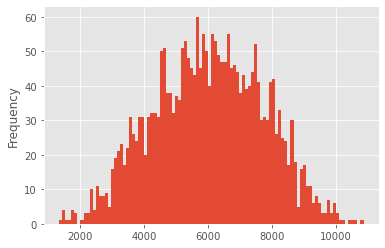

In [106]:
hw_abt_2_byuser_A['metric_value'].plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

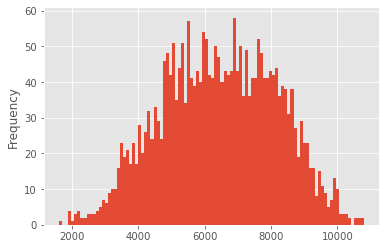

In [107]:
hw_abt_2_byuser_B['metric_value'].plot.hist(bins=100)

<AxesSubplot:>

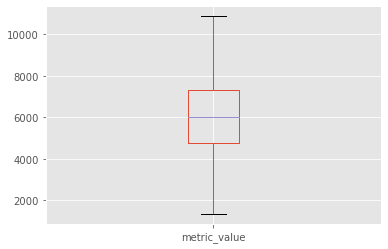

In [108]:
import matplotlib.pyplot as plt
hw_abt_2_byuser_A['metric_value'].plot.box()


<AxesSubplot:>

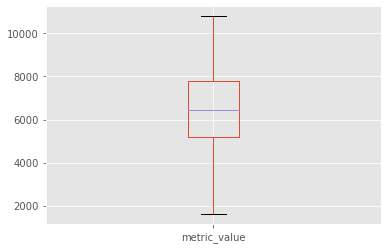

In [109]:
import matplotlib.pyplot as plt
hw_abt_2_byuser_B['metric_value'].plot.box()

Гистограмма метрики metric_value похожа на гистограмму нормально распределенной величины, но она более заострена к верху. Для экспериментальной группы значения в среднем выше, чем для контрольной.

<AxesSubplot:ylabel='Frequency'>

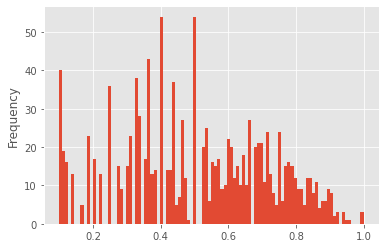

In [111]:
share_visits_A.plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

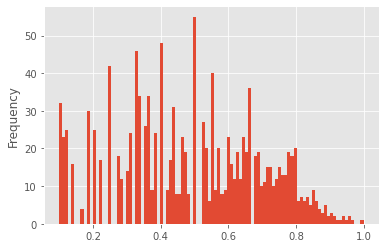

In [112]:
share_visits_B.plot.hist(bins=100)

<AxesSubplot:>

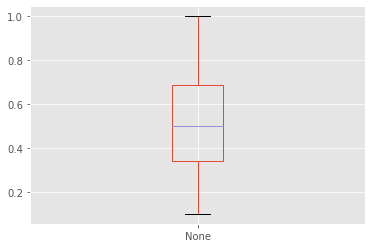

In [113]:
share_visits_A.plot.box()

<AxesSubplot:>

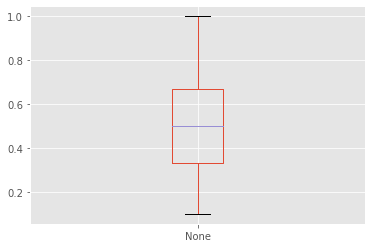

In [114]:
share_visits_B.plot.box()

Гистограмма метрики share_visits совсем непохожа на гистограмму нормально распределенной величины и имеет явную дискретность. По боксплоту трудно сказать о каком-либо отличии данной метрики для двух выборок.

<AxesSubplot:ylabel='Frequency'>

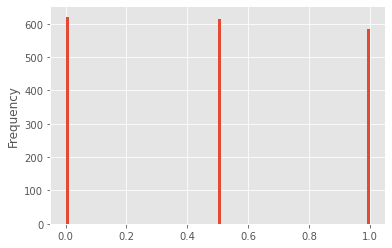

In [116]:
share_churn_users_A.plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

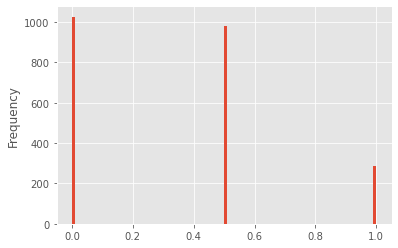

In [117]:
share_churn_users_B.plot.hist(bins=100)

<AxesSubplot:>

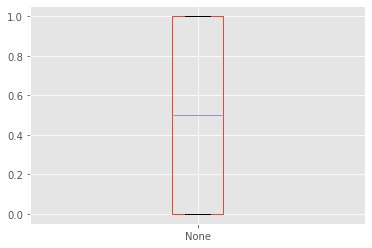

In [118]:
share_churn_users_A.plot.box()

<AxesSubplot:>

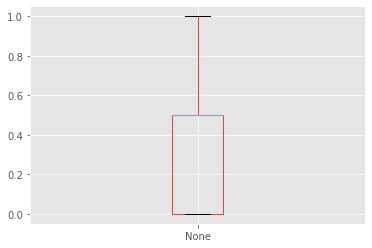

In [119]:
share_churn_users_B.plot.box()

Гистограмма метрики share_churn_users имеет 3 значения(специфика данных) и по боксплоту и по гистограммам мы видим, что для двух выборок имеются значимые отличия. Доля ушедших пользователей гораздо ниже для экспериментальной группы. По этому параметру влияние изменений положительно. Для более детального решения, этих результатов недостаточно и необходимо дальнейшее исследование.